In [170]:
from trimesh.path.polygons import medial_axis
import geopandas as gpd
from shapely.geometry import *
import pandas as pd

In [193]:
fsp = gpd.read_file('fsp_sample_mre1.shp')
fsp.to_crs(26913, inplace=True)
fsp = fsp[['geometry']]
fsp.reset_index(inplace=True)

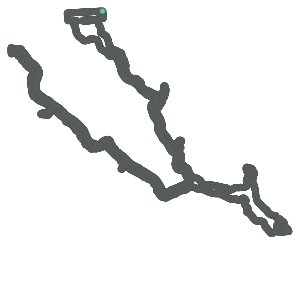

In [172]:
cuts = fsp.geometry.length
fsp_points = MultiPoint([fsp.geometry.boundary[0].interpolate(i/int(cuts), normalized=True) for i in range(1, int(cuts))])
fsp_points


In [173]:
point_ls = list(fsp_points.geoms)
point_ls
poly = Polygon([p.coords[0] for p in point_ls])

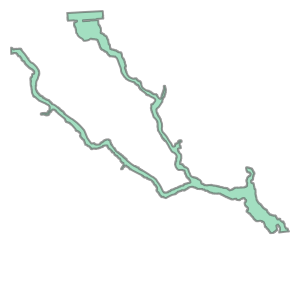

In [194]:
poly

In [195]:
center = medial_axis(fsp.geometry[0])

In [196]:
vertices = center[1]
edges = center[0]
edges


array([[ 10,  11],
       [ 11,  12],
       [  4,   5],
       [  5,  10],
       [ 15,  16],
       [  0,   7],
       [  7,  15],
       [  8,  16],
       [ 35,  36],
       [ 39,  40],
       [ 40,  41],
       [ 33,  34],
       [ 33,  41],
       [ 45,  48],
       [ 46,  47],
       [ 47,  48],
       [  9,  45],
       [  9,  43],
       [  1,  46],
       [ 42,  47],
       [ 49,  50],
       [ 50,  51],
       [ 52,  53],
       [ 53,  54],
       [ 49,  54],
       [ 59,  61],
       [ 58,  62],
       [ 17,  65],
       [ 17,  18],
       [ 65,  66],
       [ 67,  69],
       [ 68,  69],
       [ 19,  67],
       [ 66,  68],
       [ 18,  71],
       [ 72,  74],
       [ 71,  75],
       [ 74,  75],
       [ 76,  77],
       [ 77,  78],
       [ 78,  79],
       [ 23,  24],
       [ 23,  76],
       [ 43,  44],
       [ 44,  79],
       [  3,  80],
       [  3,  39],
       [ 21,  82],
       [ 81,  82],
       [ 29,  83],
       [ 83,  84],
       [ 21,  85],
       [ 22,

In [197]:
edge_s = pd.DataFrame(edges, columns=['id1', 'id2'])

In [198]:
edge_s.loc[edge_s['id1'] == 49]


,id1,id2
20,49,50
24,49,54


In [199]:
points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(vdf['x'], vdf['y']), crs=26913)
points.to_file('medial_points_original.shp')

In [200]:
vdf = pd.DataFrame(vertices, columns=['x', 'y'])
vdf.reset_index(inplace=True)
vdf

,index,x,y
0,0,1.262319e+06,3.631590e+06
1,1,1.263380e+06,3.630990e+06
2,2,1.263907e+06,3.630532e+06
3,3,1.263165e+06,3.630779e+06
4,4,1.263302e+06,3.631334e+06
...,...,...,...
185,185,1.263830e+06,3.630669e+06
186,186,1.263845e+06,3.630681e+06
187,187,1.263852e+06,3.630722e+06
188,188,1.263852e+06,3.630768e+06


In [201]:
vdf1join = vdf.merge(edge_s, left_on='index', right_on='id1')

In [202]:
vdf1join = vdf1join[['index', 'x', 'y', 'id1']]

In [203]:
vdf2join = vdf.merge(edge_s, left_on='index', right_on='id2')
vdf2join

,index,x,y,id1,id2
0,5,1.263283e+06,3.631295e+06,4,5
1,7,1.262346e+06,3.631574e+06,0,7
2,10,1.263290e+06,3.631289e+06,5,10
3,11,1.263260e+06,3.631249e+06,10,11
4,12,1.263260e+06,3.631249e+06,11,12
...,...,...,...,...,...
184,186,1.263845e+06,3.630681e+06,184,186
185,187,1.263852e+06,3.630722e+06,186,187
186,188,1.263852e+06,3.630768e+06,173,188
187,189,1.263837e+06,3.630739e+06,188,189


In [204]:
vdf2join = vdf2join[['index', 'x', 'y', 'id2']]

In [205]:
vdf1join

,index,x,y,id1
0,0,1.262319e+06,3.631590e+06,0
1,1,1.263380e+06,3.630990e+06,1
2,2,1.263907e+06,3.630532e+06,2
3,2,1.263907e+06,3.630532e+06,2
4,3,1.263165e+06,3.630779e+06,3
...,...,...,...,...
184,184,1.263833e+06,3.630669e+06,184
185,184,1.263833e+06,3.630669e+06,184
186,186,1.263845e+06,3.630681e+06,186
187,187,1.263852e+06,3.630722e+06,187


In [206]:
vdf2join

,index,x,y,id2
0,5,1.263283e+06,3.631295e+06,5
1,7,1.262346e+06,3.631574e+06,7
2,10,1.263290e+06,3.631289e+06,10
3,11,1.263260e+06,3.631249e+06,11
4,12,1.263260e+06,3.631249e+06,12
...,...,...,...,...
184,186,1.263845e+06,3.630681e+06,186
185,187,1.263852e+06,3.630722e+06,187
186,188,1.263852e+06,3.630768e+06,188
187,189,1.263837e+06,3.630739e+06,189


In [207]:
temp = vdf1join.merge(edge_s, how='right')
temp

,index,x,y,id1,id2
0,10,1.263290e+06,3.631289e+06,10,11
1,11,1.263260e+06,3.631249e+06,11,12
2,11,1.263260e+06,3.631249e+06,11,12
3,4,1.263302e+06,3.631334e+06,4,5
4,5,1.263283e+06,3.631295e+06,5,10
...,...,...,...,...,...
266,184,1.263833e+06,3.630669e+06,184,186
267,172,1.263865e+06,3.630804e+06,172,173
268,188,1.263852e+06,3.630768e+06,188,189
269,173,1.263857e+06,3.630769e+06,173,188


In [208]:
out = temp.merge(vdf2join, left_on='id2', right_on='id2')
out

,index_x,x_x,y_x,id1,id2,index_y,x_y,y_y
0,10,1.263290e+06,3.631289e+06,10,11,11,1.263260e+06,3.631249e+06
1,11,1.263260e+06,3.631249e+06,11,12,12,1.263260e+06,3.631249e+06
2,11,1.263260e+06,3.631249e+06,11,12,12,1.263260e+06,3.631249e+06
3,4,1.263302e+06,3.631334e+06,4,5,5,1.263283e+06,3.631295e+06
4,5,1.263283e+06,3.631295e+06,5,10,10,1.263290e+06,3.631289e+06
...,...,...,...,...,...,...,...,...
386,188,1.263852e+06,3.630768e+06,188,189,189,1.263837e+06,3.630739e+06
387,188,1.263852e+06,3.630768e+06,188,189,189,1.263837e+06,3.630739e+06
388,187,1.263852e+06,3.630722e+06,187,189,189,1.263837e+06,3.630739e+06
389,187,1.263852e+06,3.630722e+06,187,189,189,1.263837e+06,3.630739e+06


In [209]:
out = out[['id1', 'x_x', 'y_x', 'id2', 'x_y', 'y_y']]
out

,id1,x_x,y_x,id2,x_y,y_y
0,10,1.263290e+06,3.631289e+06,11,1.263260e+06,3.631249e+06
1,11,1.263260e+06,3.631249e+06,12,1.263260e+06,3.631249e+06
2,11,1.263260e+06,3.631249e+06,12,1.263260e+06,3.631249e+06
3,4,1.263302e+06,3.631334e+06,5,1.263283e+06,3.631295e+06
4,5,1.263283e+06,3.631295e+06,10,1.263290e+06,3.631289e+06
...,...,...,...,...,...,...
386,188,1.263852e+06,3.630768e+06,189,1.263837e+06,3.630739e+06
387,188,1.263852e+06,3.630768e+06,189,1.263837e+06,3.630739e+06
388,187,1.263852e+06,3.630722e+06,189,1.263837e+06,3.630739e+06
389,187,1.263852e+06,3.630722e+06,189,1.263837e+06,3.630739e+06


In [210]:
out['id1Point'] = out.apply(lambda x: Point(x['x_x'], x['y_x']), axis=1)
out['id2Point'] = out.apply(lambda x: Point(x['x_y'], x['y_y']), axis=1)
out['Line'] = out.apply(lambda x: LineString([x['id1Point'], x['id2Point']]), axis=1)
out

D:\mini-forge\envs\geopandas\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\abreunig\AppData\Local\Temp\2\ipykernel_7484\3612100659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['id1Point'] = out.apply(lambda x: Point(x['x_x'], x['y_x']), axis=1)
D:\mini-forge\envs\geopandas\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values

,id1,x_x,y_x,id2,x_y,y_y,id1Point,id2Point,Line
0,10,1.263290e+06,3.631289e+06,11,1.263260e+06,3.631249e+06,POINT (1263290.1359140528 3631289.286563429),POINT (1263260.0943942405 3631249.1512044244),LINESTRING (1263290.1359140528 3631289.2865634...
1,11,1.263260e+06,3.631249e+06,12,1.263260e+06,3.631249e+06,POINT (1263260.0943942405 3631249.1512044244),POINT (1263260.1360192287 3631248.7628055625),LINESTRING (1263260.0943942405 3631249.1512044...
2,11,1.263260e+06,3.631249e+06,12,1.263260e+06,3.631249e+06,POINT (1263260.0943942405 3631249.1512044244),POINT (1263260.1360192287 3631248.7628055625),LINESTRING (1263260.0943942405 3631249.1512044...
3,4,1.263302e+06,3.631334e+06,5,1.263283e+06,3.631295e+06,POINT (1263302.3873193415 3631333.729426773),POINT (1263283.1178857859 3631295.195710993),LINESTRING (1263302.3873193415 3631333.7294267...
4,5,1.263283e+06,3.631295e+06,10,1.263290e+06,3.631289e+06,POINT (1263283.1178857859 3631295.195710993),POINT (1263290.1359140528 3631289.286563429),LINESTRING (1263283.1178857859 3631295.1957109...
...,...,...,...,...,...,...,...,...,...
386,188,1.263852e+06,3.630768e+06,189,1.263837e+06,3.630739e+06,POINT (1263851.857412849 3630768.2058930183),POINT (1263836.7079447813 3630739.4895776394),LINESTRING (1263851.857412849 3630768.20589301...
387,188,1.263852e+06,3.630768e+06,189,1.263837e+06,3.630739e+06,POINT (1263851.857412849 3630768.2058930183),POINT (1263836.7079447813 3630739.4895776394),LINESTRING (1263851.857412849 3630768.20589301...
388,187,1.263852e+06,3.630722e+06,189,1.263837e+06,3.630739e+06,POINT (1263851.8858944194 3630722.068858165),POINT (1263836.7079447813 3630739.4895776394),LINESTRING (1263851.8858944194 3630722.0688581...
389,187,1.263852e+06,3.630722e+06,189,1.263837e+06,3.630739e+06,POINT (1263851.8858944194 3630722.068858165),POINT (1263836.7079447813 3630739.4895776394),LINESTRING (1263851.8858944194 3630722.0688581...


In [211]:
line_df = gpd.GeoDataFrame(out[['Line']], geometry='Line', crs=26913)

In [212]:
line_df.explore()